In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 500)
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [5]:
path = 'yelp_data/health_text_sentiment.csv'

In [8]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


df = df[['stars',
 'clean_text',
 'sent_value_clean',
 'sent_score_clean']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 4 columns):
stars               64006 non-null int64
clean_text          64006 non-null object
sent_value_clean    64006 non-null float64
sent_score_clean    64006 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
df.head()

,stars,clean_text,sent_value_clean,sent_score_clean
0,1,please stay away place bad care imaginable staff uneducated not know anything ask question give answer not even pertain ask super bizarre dr byrne not seem care feel get impression want get make money feeling put visit staff super rude want speak dr byrne would not allow literally minute procedure like go behind secure door not bother ever unless schedule another appointment squeeze another office visit much pain procedure say would not hurt lie put procedure say option schedule office visit...,-0.036719,negative
1,5,husband patient dr byrne last year half last may suffer kidney stone refer dr byrne examine test run determine would need surgery schedule surgery week later send home major pain medication even take medication husband incapacitate pain dr bryne go way call hospital reschedule emergency surgery compassionate knowledgeable dedicated doctor husband find highly approachable willing return phone call answer question day unfortunately not norm find leave arizona state urological institute follow ...,0.069479,positive
2,4,dr byrne great doctor great bed side manner explain step step office staff not good always make wait long time get call back overall experience dr byrne good happy choose procedure highly recommend,0.317778,positive
3,3,raise review dr bryne receptive daughter go anytime leave urine sample not go urgent care seem always mess anyway not provide info back dr smart thing keep look may try family member hear coach receptionist last visit nice professional way general not understand medical receptionist bad across medical profession choose job not bad far physical exertion not manual labor sorry vent happen everywhere,0.002806,positive
4,1,wish could give star bad office ever horrible experience office staff bunch teen bad attitude include office manager make appointment consult dr byrne ironwood gilbert location non responsive antibiotic uti though urgency symptom keep get bad pcp recommend see urologist asap first appointment available day give information include insurance information phone reach office half hour early ask send back home front office rep ironwood gilbert location deny take bcb group banner health indicate i...,-0.084259,negative


## split review stars and text

In [11]:
#data = df[['stars','text']]
data = df.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 4 columns):
stars               64006 non-null int64
clean_text          64006 non-null object
sent_value_clean    64006 non-null float64
sent_score_clean    64006 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [13]:
data.head()

,stars,clean_text,sent_value_clean,sent_score_clean
0,1,please stay away place bad care imaginable staff uneducated not know anything ask question give answer not even pertain ask super bizarre dr byrne not seem care feel get impression want get make money feeling put visit staff super rude want speak dr byrne would not allow literally minute procedure like go behind secure door not bother ever unless schedule another appointment squeeze another office visit much pain procedure say would not hurt lie put procedure say option schedule office visit...,-0.036719,negative
1,5,husband patient dr byrne last year half last may suffer kidney stone refer dr byrne examine test run determine would need surgery schedule surgery week later send home major pain medication even take medication husband incapacitate pain dr bryne go way call hospital reschedule emergency surgery compassionate knowledgeable dedicated doctor husband find highly approachable willing return phone call answer question day unfortunately not norm find leave arizona state urological institute follow ...,0.069479,positive
2,4,dr byrne great doctor great bed side manner explain step step office staff not good always make wait long time get call back overall experience dr byrne good happy choose procedure highly recommend,0.317778,positive
3,3,raise review dr bryne receptive daughter go anytime leave urine sample not go urgent care seem always mess anyway not provide info back dr smart thing keep look may try family member hear coach receptionist last visit nice professional way general not understand medical receptionist bad across medical profession choose job not bad far physical exertion not manual labor sorry vent happen everywhere,0.002806,positive
4,1,wish could give star bad office ever horrible experience office staff bunch teen bad attitude include office manager make appointment consult dr byrne ironwood gilbert location non responsive antibiotic uti though urgency symptom keep get bad pcp recommend see urologist asap first appointment available day give information include insurance information phone reach office half hour early ask send back home front office rep ironwood gilbert location deny take bcb group banner health indicate i...,-0.084259,negative


### stars

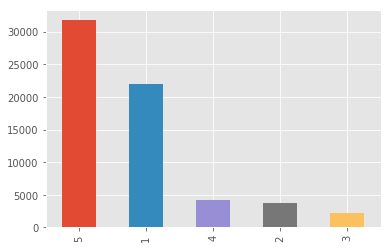

In [14]:
data.stars.value_counts().plot.bar()

### Split positive and negtative
- total positive 31,186
- total negative : 22451
- total meh : 10,853

drop 2-4

In [15]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53714 entries, 0 to 64005
Data columns (total 4 columns):
stars               53714 non-null int64
clean_text          53714 non-null object
sent_value_clean    53714 non-null float64
sent_score_clean    53714 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [17]:
data.stars.value_counts()

5    31726
1    21988
Name: stars, dtype: int64

In [18]:
data.head()

,stars,clean_text,sent_value_clean,sent_score_clean
0,1,please stay away place bad care imaginable staff uneducated not know anything ask question give answer not even pertain ask super bizarre dr byrne not seem care feel get impression want get make money feeling put visit staff super rude want speak dr byrne would not allow literally minute procedure like go behind secure door not bother ever unless schedule another appointment squeeze another office visit much pain procedure say would not hurt lie put procedure say option schedule office visit...,-0.036719,negative
1,5,husband patient dr byrne last year half last may suffer kidney stone refer dr byrne examine test run determine would need surgery schedule surgery week later send home major pain medication even take medication husband incapacitate pain dr bryne go way call hospital reschedule emergency surgery compassionate knowledgeable dedicated doctor husband find highly approachable willing return phone call answer question day unfortunately not norm find leave arizona state urological institute follow ...,0.069479,positive
4,1,wish could give star bad office ever horrible experience office staff bunch teen bad attitude include office manager make appointment consult dr byrne ironwood gilbert location non responsive antibiotic uti though urgency symptom keep get bad pcp recommend see urologist asap first appointment available day give information include insurance information phone reach office half hour early ask send back home front office rep ironwood gilbert location deny take bcb group banner health indicate i...,-0.084259,negative
5,1,go emergency room kidney stone attack emergency room recommend see dr lauren byrne resolve kidney stone issue make appointment go see nice quick get appointment ask staff put cat scan ironwood scan facility would call go follow appointment week later not call scan office put another order go scan stone mm dr byrne say let wait see pass make appointment week later go appointment go xray ultra sound say wait bit longer still open flow kidney not pass would surgery week another sever attack pai...,0.133618,positive
6,5,dr byrne excellent doctor right skill include good bed side manner treat prostate cancer originally go another issue thoroughness ability spot red flag exam decide cancer screening test not much fun show early stage cancer give option tell positive negative option decide surgery turn staff preparation also caring professional spend hour suppose hour surgery prostate become enlarged damage bladder reconstruction require spend week catheter not dr byrne attention detail catheter would take soo...,0.210708,positive


## Multinomial NB
-

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [22]:
# 1&5 starts
review = data['clean_text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.9582053430140557


## Multinomial NB Results


- all stars: `Accuracy= 0.8001240502403474`
- 1 & 5 starts: `Accuracy= 0.9561894108873975`

## LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
%%time
# 1&5 starts
review = data['clean_text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()


# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.9670483105277855
CPU times: user 50.9 s, sys: 7.67 s, total: 58.5 s
Wall time: 16.2 s


In [ ]:
%%time
# 1-5 starts
review = all_stars['text'].values.astype(str)
sentiments = all_stars['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 - 5 stars\n Accuracy=", score) 

## LogisticRegression Results
- 1& 5 starts:` Accuracy= 0.97362043251305`
- 1- 5 stars : `Accuracy= 0.8069468134594511`

## Use Ngrams Instead of Words
- 1-3
- 1-2

In [26]:
%%time
# 1&5 starts
review = data['clean_text']
sentiments = data['stars']

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 55.8 µs


In [29]:
%%time
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2)


vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,2))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.9774737038071303
CPU times: user 2min 4s, sys: 14 s, total: 2min 18s
Wall time: 37.6 s


In [27]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2)

In [28]:
%%time
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,3))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.9746811877501629
CPU times: user 3min 31s, sys: 24.3 s, total: 3min 55s
Wall time: 1min 18s


### Results
ngram_range=(1,2)
```
Accuracy= 0.8231508761048224
CPU times: user 10min 47s, sys: 27.3 s, total: 11min 14s
Wall time: 6min 58s
```

ngram_range=(1,3)
```
Accuracy= 0.829896107923709
CPU times: user 12min 47s, sys: 40.9 s, total: 13min 28s
Wall time: 9min 1s

```


- `Accuracy= 0.9793064876957495
`

#  pipeline
- Result `Accuracy= 0.9777218493661447`

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', 
     CountVectorizer(lowercase=True,ngram_range=(1, 3)))
    ,('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)
# Check our classifier performance

score = pipeline.score(X_test, y_test)

print("Accuracy=", score)

## Cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])

In [ ]:
review, sentiments = shuffle(review, sentiments) # needed??

In [ ]:
review[9]

In [ ]:
%%time
print("MeanAccuracy=", cross_val_score(pipeline, review, sentiments, cv=5).mean())

## Result:
```
MeanAccuracy= 0.9773477193058582
CPU times: user 10min 21s, sys: 44.1 s, total: 11min 5s
Wall time: 8min 45s

```

## Grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# shuffle data
review, sentiments = shuffle(review, sentiments)

In [ ]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])


classifier = GridSearchCV(pipeline, {
    # try out different ngram ranges
    'vectorizer__ngram_range': ((1, 2), (2, 3), (1, 3)),
    # check if setting all non zero counts to 1 makes a difference
    'vectorizer__binary': (True, False),},
                          n_jobs=-1, 
                          verbose=True,
                          error_score=0.0, 
                          cv=5)

In [ ]:
# %%time
# # Compute the vocabulary and train the classifier
# classifier.fit(review, sentiments)

In [ ]:
print("Best Accuracy: ", classifier.best_score_)
print("Best Parameters: ", classifier.best_params_)

## notes
- find nums truep/true neg
- 